In [1]:
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop, SGD, Adam

from keras_lropt.callbacks import LRFinderAuto as LRFinder
from utils import reset_weights

Using TensorFlow backend.


# Load and pre-process dataset

In [2]:
batch_size = 128
num_classes = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072).astype('float32') / 255
x_test = x_test.reshape(10000, 3072).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"x_train.shape: {x_train.shape}")
print(f"x_test.shape: {x_test.shape}")

x_train.shape: (50000, 3072)
x_test.shape: (10000, 3072)


# Create model

In [4]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Find max learning rate

Epoch 1/3
50000/50000 [==============================] - 52s 1ms/step - loss: 3.9381 - acc: 0.1543
Maximal learning rate: 7.66682285396902e-05
Epoch 2/3
50000/50000 [==============================] - 46s 921us/step - loss: 1.9333 - acc: 0.3080
Epoch 3/3
50000/50000 [==============================] - 47s 931us/step - loss: 1.7645 - acc: 0.3772


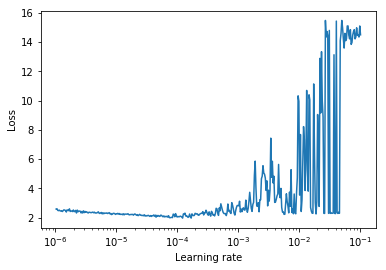

In [5]:
lrfinder = LRFinder(steps_per_epoch=x_train.shape[0]//batch_size)

hist = model.fit(x_train, y_train, epochs=3, batch_size=batch_size, callbacks=[lrfinder])